In [1]:
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import keras

2022-12-01 14:09:40.204873: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1


In [2]:
def rmse(y_true, y_pred):
    return np.sqrt(np.nanmean((y_true - y_pred)**2))

# Open dict with collocated SAR data

In [3]:
data_dir = "/lustre/storeB/project/IT/geout/machine-ocean/data_raw/sentinel/"

In [4]:
with open(data_dir + 'collocated_dict.pickle', 'rb') as handle:
        d = pickle.load(handle)

In [5]:
df = pd.concat(d.values(), ignore_index=True)
df

,CE,CN,IR,Lv,P10,Pair,Q10,Qair,RH,RH10,...,stress,ustar,yday,yyyy,lat,lon,s0_norm,s0,inc,az
0,0.131507,0.306354,344.480002,2476.816541,1005.776480,1006.983499,5.750744,5.858569,73.541799,72.235029,...,0.390204,0.563065,101.590278,2018.0,44.6393,-124.3040,-7.755438,-8.815776,32.142911,280.917511
1,0.169644,0.076862,301.660002,2477.280367,1011.450370,1012.675998,5.016032,5.128066,77.170098,76.182660,...,0.115201,0.304689,102.590278,2018.0,44.6393,-124.3040,-7.311450,-15.691008,42.147045,279.718475
2,-0.035293,-0.318466,277.445000,2476.984234,1020.763236,1021.990991,5.529764,5.616196,74.438348,73.498554,...,0.012453,0.100115,113.590278,2018.0,44.6393,-124.3040,-10.255534,-13.824358,32.153725,280.917114
3,-0.202953,-0.490062,309.255003,2476.669098,1013.606853,1014.807996,4.241058,4.533348,44.618498,40.755557,...,0.141801,0.340280,114.590278,2018.0,44.6393,-124.3040,-8.636513,-18.343288,42.149823,279.718201
4,-0.026441,-0.730744,320.615001,2475.218603,1018.266915,1019.488495,7.084940,7.120605,91.120398,91.004979,...,0.020953,0.130084,125.590277,2018.0,44.6393,-124.3040,-14.836988,-22.981560,32.146370,280.917114
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,-0.163630,-0.079919,245.750001,2488.148243,1018.647439,1019.905991,2.457910,2.588437,55.943499,53.707513,...,0.127772,0.316749,441.925000,2019.0,40.1334,-70.7785,-10.961686,-14.861003,31.669628,439.104340
196,-0.163630,-0.079919,334.450005,2487.481136,988.859930,990.059491,6.373908,6.305663,96.755999,96.861082,...,0.077808,0.252194,446.466667,2019.0,40.1334,-70.7785,-9.263327,-15.555002,36.941170,280.305023
197,-0.163630,-0.079919,310.754999,2488.029252,992.263616,993.473001,4.684813,4.736986,78.480299,77.504958,...,0.378212,0.553690,446.966667,2019.0,40.1334,-70.7785,-5.838643,-12.942726,42.401340,440.393127
198,-0.163630,-0.079919,320.205003,2486.554899,1019.038234,1020.272504,6.125720,6.060065,92.756199,92.187117,...,0.023995,0.138103,453.925000,2019.0,40.1334,-70.7785,-11.901174,-16.743696,31.674418,439.104279


In [6]:
df = df.dropna(subset=['UWr', 'rhoair'])
df

,CE,CN,IR,Lv,P10,Pair,Q10,Qair,RH,RH10,...,stress,ustar,yday,yyyy,lat,lon,s0_norm,s0,inc,az
0,0.131507,0.306354,344.480002,2476.816541,1005.776480,1006.983499,5.750744,5.858569,73.541799,72.235029,...,0.390204,0.563065,101.590278,2018.0,44.6393,-124.3040,-7.755438,-8.815776,32.142911,280.917511
1,0.169644,0.076862,301.660002,2477.280367,1011.450370,1012.675998,5.016032,5.128066,77.170098,76.182660,...,0.115201,0.304689,102.590278,2018.0,44.6393,-124.3040,-7.311450,-15.691008,42.147045,279.718475
2,-0.035293,-0.318466,277.445000,2476.984234,1020.763236,1021.990991,5.529764,5.616196,74.438348,73.498554,...,0.012453,0.100115,113.590278,2018.0,44.6393,-124.3040,-10.255534,-13.824358,32.153725,280.917114
3,-0.202953,-0.490062,309.255003,2476.669098,1013.606853,1014.807996,4.241058,4.533348,44.618498,40.755557,...,0.141801,0.340280,114.590278,2018.0,44.6393,-124.3040,-8.636513,-18.343288,42.149823,279.718201
4,-0.026441,-0.730744,320.615001,2475.218603,1018.266915,1019.488495,7.084940,7.120605,91.120398,91.004979,...,0.020953,0.130084,125.590277,2018.0,44.6393,-124.3040,-14.836988,-22.981560,32.146370,280.917114
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,-0.163630,-0.079919,245.750001,2488.148243,1018.647439,1019.905991,2.457910,2.588437,55.943499,53.707513,...,0.127772,0.316749,441.925000,2019.0,40.1334,-70.7785,-10.961686,-14.861003,31.669628,439.104340
196,-0.163630,-0.079919,334.450005,2487.481136,988.859930,990.059491,6.373908,6.305663,96.755999,96.861082,...,0.077808,0.252194,446.466667,2019.0,40.1334,-70.7785,-9.263327,-15.555002,36.941170,280.305023
197,-0.163630,-0.079919,310.754999,2488.029252,992.263616,993.473001,4.684813,4.736986,78.480299,77.504958,...,0.378212,0.553690,446.966667,2019.0,40.1334,-70.7785,-5.838643,-12.942726,42.401340,440.393127
198,-0.163630,-0.079919,320.205003,2486.554899,1019.038234,1020.272504,6.125720,6.060065,92.756199,92.187117,...,0.023995,0.138103,453.925000,2019.0,40.1334,-70.7785,-11.901174,-16.743696,31.674418,439.104279


In [7]:
200*0.8

160.0

In [8]:
split_idx = 160

# Prepare features and labels

In [9]:
predictor_variables = ['s0', 'inc', 'az']

In [10]:
x = df[predictor_variables]
x

,s0,inc,az
0,-8.815776,32.142911,280.917511
1,-15.691008,42.147045,279.718475
2,-13.824358,32.153725,280.917114
3,-18.343288,42.149823,279.718201
4,-22.981560,32.146370,280.917114
...,...,...,...
195,-14.861003,31.669628,439.104340
196,-15.555002,36.941170,280.305023
197,-12.942726,42.401340,440.393127
198,-16.743696,31.674418,439.104279


In [11]:
y = - df['UWr'] * df['rhoair']
y

0      0.406533
1      0.086024
2     -0.000344
3      0.151889
4      0.023080
         ...   
195    0.117929
196    0.108348
197    0.421481
198    0.016227
199    2.127876
Length: 196, dtype: float64

NaNs: 

2018-12-04 11:10:59.993607         NaN

2018-12-16 23:11:59.981755         NaN

# COARE

In [12]:
c = df['stress']

In [13]:
x_train = x[:split_idx]
x_test = x[split_idx:]

In [14]:
y_train = y[:split_idx]
y_test = y[split_idx:]

In [15]:
c_train = c[:split_idx]
c_test = c[split_idx:]

# ML setup

In [16]:
OUT_STEPS = 1
num_features = 1
batch_size =32
epochs=500

metric = 'mean_absolute_error'

In [17]:
try:
    del history
    del multi_dense_model
except:
    print('Variables do not exist')

Variables do not exist


# First experiment - Linear regression

In [18]:
multi_dense_model = tf.keras.Sequential([
    #tf.keras.layers.Dense(32, activation='relu'),
    #tf.keras.layers.BatchNormalization(),
    #tf.keras.layers.Dropout(rate=0.3),
    #tf.keras.layers.Dense(16, activation='relu'),
    #tf.keras.layers.BatchNormalization(),
    #tf.keras.layers.Dropout(rate=0.4),
    tf.keras.layers.Dense(1)    
])

callbacks = [
    keras.callbacks.ModelCheckpoint(
        "best_model.h5", save_best_only=True, monitor="val_loss"
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=20, min_lr=0.0001
    ),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=50, verbose=1),
]

multi_dense_model.compile(
    optimizer=tf.optimizers.Adam(),
    loss=tf.losses.MeanSquaredError(),
    metrics=[tf.metrics.MeanAbsoluteError()],
)


history = multi_dense_model.fit(
    x_train,
    y_train,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_split=0.3,
    verbose=1,
)

2022-12-01 14:09:43.156339: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2022-12-01 14:09:43.157454: W tensorflow/stream_executor/platform/default/dso_loader.cc:60] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-12-01 14:09:43.157464: W tensorflow/stream_executor/cuda/cuda_driver.cc:326] failed call to cuInit: UNKNOWN ERROR (303)
2022-12-01 14:09:43.157483: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (c6525-1l5jvp3-bn-compute): /proc/driver/nvidia/version does not exist
2022-12-01 14:09:43.157703: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, 

Epoch 1/500
4/4 [==============================] - 1s 181ms/step - loss: 13790.3096 - mean_absolute_error: 113.2150 - val_loss: 15001.2939 - val_mean_absolute_error: 118.3094
Epoch 2/500
4/4 [==============================] - 0s 7ms/step - loss: 13833.0947 - mean_absolute_error: 113.2213 - val_loss: 14602.2227 - val_mean_absolute_error: 116.6955
Epoch 3/500
4/4 [==============================] - 0s 7ms/step - loss: 13738.5803 - mean_absolute_error: 112.8200 - val_loss: 14210.2109 - val_mean_absolute_error: 115.0882
Epoch 4/500
4/4 [==============================] - 0s 7ms/step - loss: 13424.2477 - mean_absolute_error: 111.5094 - val_loss: 13825.7422 - val_mean_absolute_error: 113.4901
Epoch 5/500
4/4 [==============================] - 0s 7ms/step - loss: 13013.7234 - mean_absolute_error: 109.7395 - val_loss: 13448.7939 - val_mean_absolute_error: 111.9014
Epoch 6/500
4/4 [==============================] - 0s 7ms/step - loss: 12975.1531 - mean_absolute_error: 109.5498 - val_loss: 13078.9


KeyboardInterrupt



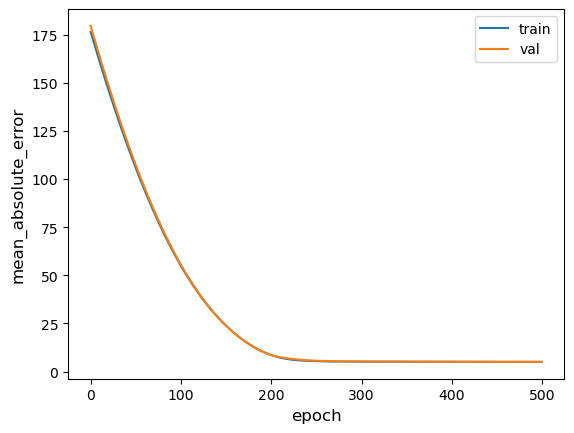

2/2 [==============================] - 0s 1ms/step - loss: 53.5179 - mean_absolute_error: 6.4931
Test accuracy 6.493096351623535
Test loss 53.517948150634766


In [171]:
metric = 'mean_absolute_error'
plt.figure()
plt.plot(history.history[metric])
plt.plot(history.history["val_" + metric])
#plt.title("model " + metric + "\n Dense 32 + dense 16 + batch normalization + dropout 0.3")
plt.ylabel(metric, fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val"], loc="best")
plt.show()
plt.close()

#model = keras.models.load_model("best_model.h5")

test_loss, test_acc = multi_dense_model.evaluate(x_test, y_test)

print("Test accuracy", test_acc)
print("Test loss", test_loss)

In [172]:
y_test_pred = multi_dense_model.predict(x_test)

In [173]:
np.mean(y_test)

0.5215241204286514

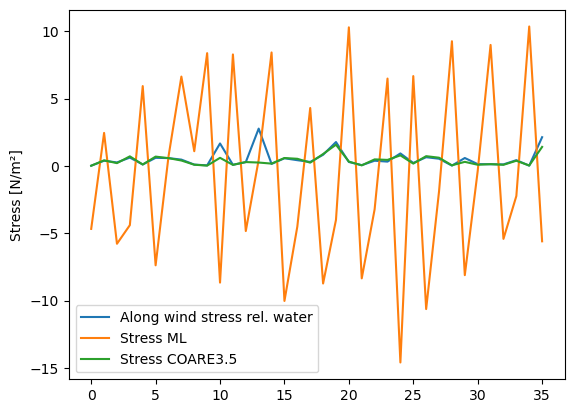

In [174]:
plt.plot(y_test.values, label='Along wind stress rel. water')
plt.plot(y_test_pred, label='Stress ML')
plt.plot(c_test.values, label='Stress COARE3.5')
plt.ylabel('Stress [N/m²]')
plt.legend()

In [175]:
rmse(y_test.values, y_test_pred)

7.096667927748365

In [176]:
rmse(y_test.values, c_test)

0.47862192428274747

# Other experiments

In [177]:
OUT_STEPS = 1
num_features = 1
batch_size =32
epochs=500

metric = 'mean_absolute_error'

In [178]:
try:
    del history
    del multi_dense_model
except:
    print('Variables do not exist')

In [179]:
multi_dense_model = tf.keras.Sequential([
    #tf.keras.layers.Dense(32, activation='relu'),
    #tf.keras.layers.BatchNormalization(),
    #tf.keras.layers.Dropout(rate=0.3),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    #tf.keras.layers.Dropout(rate=0.4),
    tf.keras.layers.Dense(1)    
])

callbacks = [
    keras.callbacks.ModelCheckpoint(
        "best_model.h5", save_best_only=True, monitor="val_loss"
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=20, min_lr=0.0001
    ),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=50, verbose=1),
]

multi_dense_model.compile(
    optimizer=tf.optimizers.Adam(),
    loss=tf.losses.MeanSquaredError(),
    metrics=[tf.metrics.MeanAbsoluteError()],
)


history = multi_dense_model.fit(
    x_train,
    y_train,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_split=0.3,
    verbose=1,
)

Epoch 1/500
4/4 [==============================] - 1s 33ms/step - loss: 6.8449 - mean_absolute_error: 1.4815 - val_loss: 291.5696 - val_mean_absolute_error: 16.2108
Epoch 2/500
4/4 [==============================] - 0s 7ms/step - loss: 3.2836 - mean_absolute_error: 1.2437 - val_loss: 134.4612 - val_mean_absolute_error: 10.9873
Epoch 3/500
4/4 [==============================] - 0s 7ms/step - loss: 3.9140 - mean_absolute_error: 1.2846 - val_loss: 80.4579 - val_mean_absolute_error: 8.5167
Epoch 4/500
4/4 [==============================] - 0s 7ms/step - loss: 3.0854 - mean_absolute_error: 1.1021 - val_loss: 53.8994 - val_mean_absolute_error: 6.9754
Epoch 5/500
4/4 [==============================] - 0s 7ms/step - loss: 4.8573 - mean_absolute_error: 1.1942 - val_loss: 41.0966 - val_mean_absolute_error: 6.0472
Epoch 6/500
4/4 [==============================] - 0s 7ms/step - loss: 4.9519 - mean_absolute_error: 1.0774 - val_loss: 33.6816 - val_mean_absolute_error: 5.4255
Epoch 7/500
4/4 [======

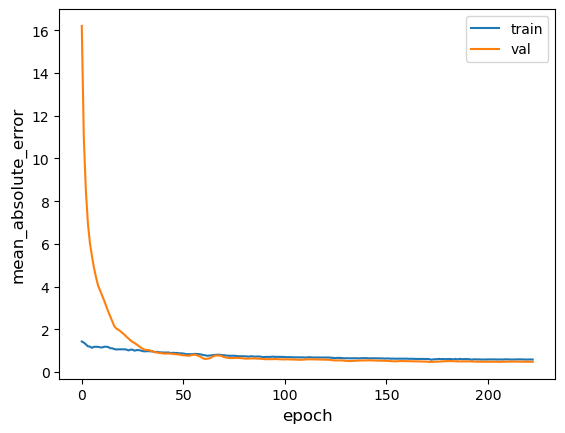

2/2 [==============================] - 0s 2ms/step - loss: 1.1242 - mean_absolute_error: 0.8456
Test accuracy 0.8455976843833923
Test loss 1.1242139339447021


In [180]:
metric = 'mean_absolute_error'
plt.figure()
plt.plot(history.history[metric])
plt.plot(history.history["val_" + metric])
#plt.title("model " + metric + "\n Dense 32 + dense 16 + batch normalization + dropout 0.3")
plt.ylabel(metric, fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val"], loc="best")
plt.show()
plt.close()

#model = keras.models.load_model("best_model.h5")

test_loss, test_acc = multi_dense_model.evaluate(x_test, y_test)

print("Test accuracy", test_acc)
print("Test loss", test_loss)

In [181]:
y_test_pred = multi_dense_model.predict(x_test)

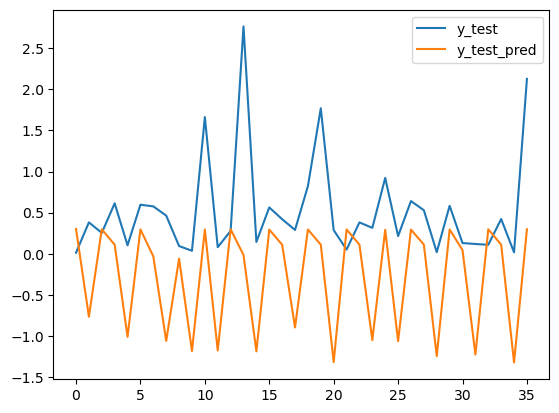

In [182]:
plt.plot(y_test.values, label='y_test')
plt.plot(y_test_pred, label='y_test_pred')
plt.legend()

In [183]:
rmse(y_test.values, y_test_pred)

1.198457685913719

In [36]:
OUT_STEPS = 1
num_features = 1
batch_size =32
epochs=500

metric = 'mean_absolute_error'

In [37]:
try:
    del history
    del multi_dense_model
except:
    print('Variables do not exist')

In [38]:
multi_dense_model = tf.keras.Sequential([
    #tf.keras.layers.Dense(32, activation='relu'),
    #tf.keras.layers.BatchNormalization(),
    #tf.keras.layers.Dropout(rate=0.3),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(1)    
])

callbacks = [
    keras.callbacks.ModelCheckpoint(
        "best_model.h5", save_best_only=True, monitor="val_loss"
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=20, min_lr=0.0001
    ),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=50, verbose=1),
]

multi_dense_model.compile(
    optimizer=tf.optimizers.Adam(),
    loss=tf.losses.MeanSquaredError(),
    metrics=[tf.metrics.MeanAbsoluteError()],
)


history = multi_dense_model.fit(
    x_train,
    y_train,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_split=0.3,
    verbose=1,
)

Epoch 1/500
4/4 [==============================] - 0s 34ms/step - loss: 2.6847 - mean_absolute_error: 0.5312 - val_loss: 12.2734 - val_mean_absolute_error: 3.3370
Epoch 2/500
4/4 [==============================] - 0s 8ms/step - loss: 2.7231 - mean_absolute_error: 0.5152 - val_loss: 4.5983 - val_mean_absolute_error: 1.9311
Epoch 3/500
4/4 [==============================] - 0s 7ms/step - loss: 6.5350 - mean_absolute_error: 0.7247 - val_loss: 2.4601 - val_mean_absolute_error: 1.3740
Epoch 4/500
4/4 [==============================] - 0s 8ms/step - loss: 2.6743 - mean_absolute_error: 0.5680 - val_loss: 1.6709 - val_mean_absolute_error: 1.1349
Epoch 5/500
4/4 [==============================] - 0s 7ms/step - loss: 6.1908 - mean_absolute_error: 0.7201 - val_loss: 1.2659 - val_mean_absolute_error: 0.9893
Epoch 6/500
4/4 [==============================] - 0s 8ms/step - loss: 3.7498 - mean_absolute_error: 0.5947 - val_loss: 1.0185 - val_mean_absolute_error: 0.8878
Epoch 7/500
4/4 [===============

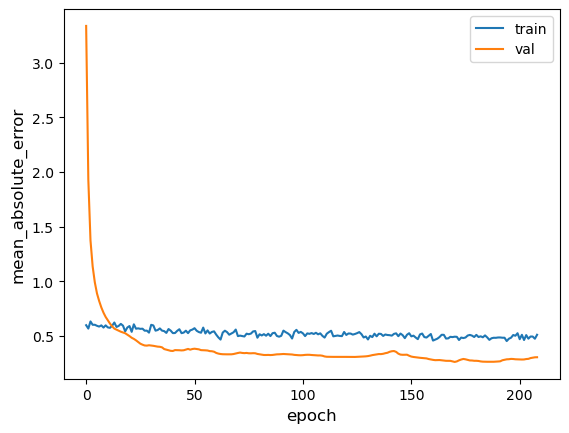

2/2 [==============================] - 0s 2ms/step - loss: 0.6933 - mean_absolute_error: 0.6253
Test accuracy 0.6252719759941101
Test loss 0.6933016777038574


In [39]:
metric = 'mean_absolute_error'
plt.figure()
plt.plot(history.history[metric])
plt.plot(history.history["val_" + metric])
#plt.title("model " + metric + "\n Dense 32 + dense 16 + batch normalization + dropout 0.3")
plt.ylabel(metric, fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val"], loc="best")
plt.show()
plt.close()

#model = keras.models.load_model("best_model.h5")

test_loss, test_acc = multi_dense_model.evaluate(x_test, y_test)

print("Test accuracy", test_acc)
print("Test loss", test_loss)

In [40]:
y_test_pred = multi_dense_model.predict(x_test)

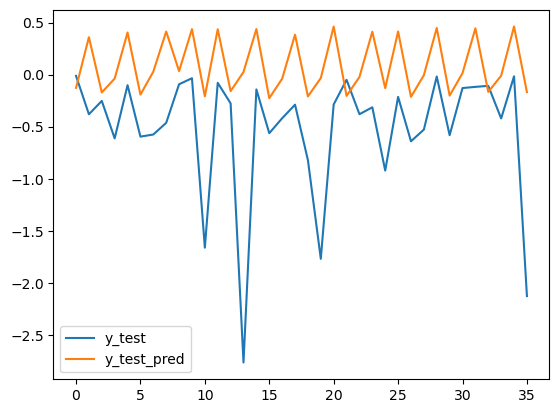

In [41]:
plt.plot(y_test.values, label='y_test')
plt.plot(y_test_pred, label='y_test_pred')
plt.legend()

In [42]:
rmse(y_test.values, y_test_pred)

0.9040924226457081

In [43]:
OUT_STEPS = 1
num_features = 1
batch_size =32
epochs=500

metric = 'mean_absolute_error'

In [44]:
try:
    del history
    del multi_dense_model
except:
    print('Variables do not exist')

In [45]:
multi_dense_model = tf.keras.Sequential([
    #tf.keras.layers.Dense(32, activation='relu'),
    #tf.keras.layers.BatchNormalization(),
    #tf.keras.layers.Dropout(rate=0.3),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.1),
    tf.keras.layers.Dense(1)    
])

callbacks = [
    keras.callbacks.ModelCheckpoint(
        "best_model.h5", save_best_only=True, monitor="val_loss"
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=20, min_lr=0.0001
    ),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=50, verbose=1),
]

multi_dense_model.compile(
    optimizer=tf.optimizers.Adam(),
    loss=tf.losses.MeanSquaredError(),
    metrics=[tf.metrics.MeanAbsoluteError()],
)


history = multi_dense_model.fit(
    x_train,
    y_train,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_split=0.3,
    verbose=1,
)

Epoch 1/500
4/4 [==============================] - 0s 35ms/step - loss: 6.2163 - mean_absolute_error: 0.4698 - val_loss: 0.2653 - val_mean_absolute_error: 0.2419
Epoch 2/500
4/4 [==============================] - 0s 8ms/step - loss: 1.5990 - mean_absolute_error: 0.2608 - val_loss: 0.2639 - val_mean_absolute_error: 0.2393
Epoch 3/500
4/4 [==============================] - 0s 8ms/step - loss: 2.4882 - mean_absolute_error: 0.3249 - val_loss: 0.2642 - val_mean_absolute_error: 0.2398
Epoch 4/500
4/4 [==============================] - 0s 7ms/step - loss: 2.4483 - mean_absolute_error: 0.3064 - val_loss: 0.2642 - val_mean_absolute_error: 0.2398
Epoch 5/500
4/4 [==============================] - 0s 7ms/step - loss: 3.7031 - mean_absolute_error: 0.3554 - val_loss: 0.2643 - val_mean_absolute_error: 0.2401
Epoch 6/500
4/4 [==============================] - 0s 7ms/step - loss: 6.2277 - mean_absolute_error: 0.4771 - val_loss: 0.2642 - val_mean_absolute_error: 0.2399
Epoch 7/500
4/4 [================

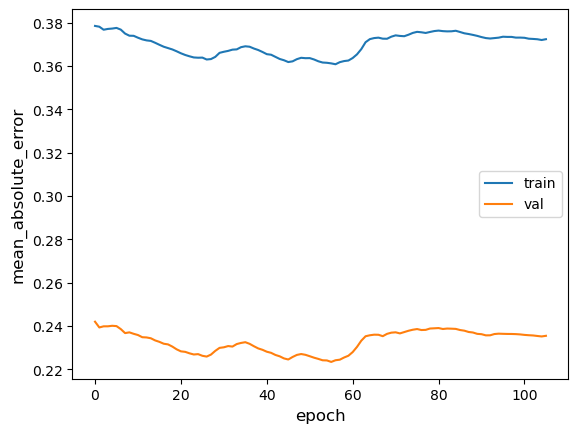

2/2 [==============================] - 0s 1ms/step - loss: 0.6460 - mean_absolute_error: 0.5174
Test accuracy 0.5174015760421753
Test loss 0.6460357904434204


In [46]:
metric = 'mean_absolute_error'
plt.figure()
plt.plot(history.history[metric])
plt.plot(history.history["val_" + metric])
#plt.title("model " + metric + "\n Dense 32 + dense 16 + batch normalization + dropout 0.3")
plt.ylabel(metric, fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val"], loc="best")
plt.show()
plt.close()

#model = keras.models.load_model("best_model.h5")

test_loss, test_acc = multi_dense_model.evaluate(x_test, y_test)

print("Test accuracy", test_acc)
print("Test loss", test_loss)

In [47]:
y_test_pred = multi_dense_model.predict(x_test)

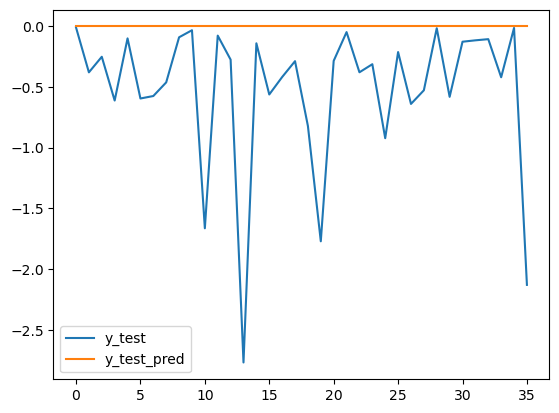

In [48]:
plt.plot(y_test.values, label='y_test')
plt.plot(y_test_pred, label='y_test_pred')
plt.legend()

In [49]:
rmse(y_test.values, y_test_pred)

0.8037634632101491

In [184]:
OUT_STEPS = 1
num_features = 1
batch_size =16
epochs=500

metric = 'mean_absolute_error'

In [185]:
try:
    del history
    del multi_dense_model
except:
    print('Variables do not exist')

In [186]:
multi_dense_model = tf.keras.Sequential([
    #tf.keras.layers.Dense(32, activation='relu'),
    #tf.keras.layers.BatchNormalization(),
    #tf.keras.layers.Dropout(rate=0.3),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.1),
    tf.keras.layers.Dense(1)    
])

callbacks = [
    keras.callbacks.ModelCheckpoint(
        "best_model.h5", save_best_only=True, monitor="val_loss"
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=20, min_lr=0.0001
    ),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=50, verbose=1),
]

multi_dense_model.compile(
    optimizer=tf.optimizers.Adam(),
    loss=tf.losses.MeanSquaredError(),
    metrics=[tf.metrics.MeanAbsoluteError()],
)


history = multi_dense_model.fit(
    x_train,
    y_train,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_split=0.3,
    verbose=1,
)

Epoch 1/500
7/7 [==============================] - 0s 17ms/step - loss: 7.3275 - mean_absolute_error: 1.6105 - val_loss: 777.9258 - val_mean_absolute_error: 27.2182
Epoch 2/500
7/7 [==============================] - 0s 4ms/step - loss: 9.4110 - mean_absolute_error: 1.6571 - val_loss: 348.3020 - val_mean_absolute_error: 18.1422
Epoch 3/500
7/7 [==============================] - 0s 4ms/step - loss: 5.1042 - mean_absolute_error: 1.6051 - val_loss: 195.5791 - val_mean_absolute_error: 13.5342
Epoch 4/500
7/7 [==============================] - 0s 5ms/step - loss: 6.6422 - mean_absolute_error: 1.4972 - val_loss: 127.3672 - val_mean_absolute_error: 10.8659
Epoch 5/500
7/7 [==============================] - 0s 5ms/step - loss: 4.6462 - mean_absolute_error: 1.3300 - val_loss: 90.7260 - val_mean_absolute_error: 9.1166
Epoch 6/500
7/7 [==============================] - 0s 4ms/step - loss: 4.7132 - mean_absolute_error: 1.3914 - val_loss: 65.6744 - val_mean_absolute_error: 7.7030
Epoch 7/500
7/7 [==

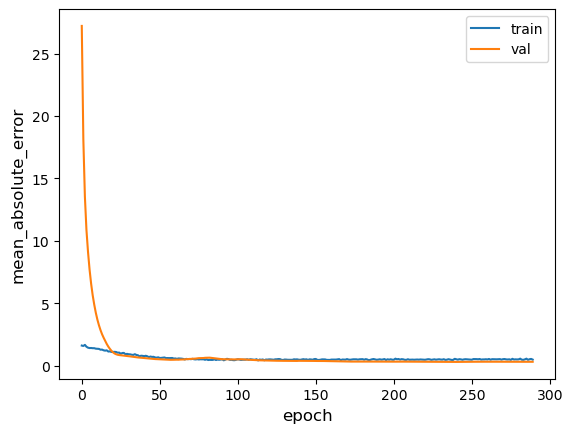

2/2 [==============================] - 0s 2ms/step - loss: 0.6610 - mean_absolute_error: 0.5893
Test accuracy 0.5892810821533203
Test loss 0.6609892249107361


In [187]:
metric = 'mean_absolute_error'
plt.figure()
plt.plot(history.history[metric])
plt.plot(history.history["val_" + metric])
#plt.title("model " + metric + "\n Dense 32 + dense 16 + batch normalization + dropout 0.3")
plt.ylabel(metric, fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val"], loc="best")
plt.show()
plt.close()

#model = keras.models.load_model("best_model.h5")

test_loss, test_acc = multi_dense_model.evaluate(x_test, y_test)

print("Test accuracy", test_acc)
print("Test loss", test_loss)

In [188]:
y_test_pred = multi_dense_model.predict(x_test)

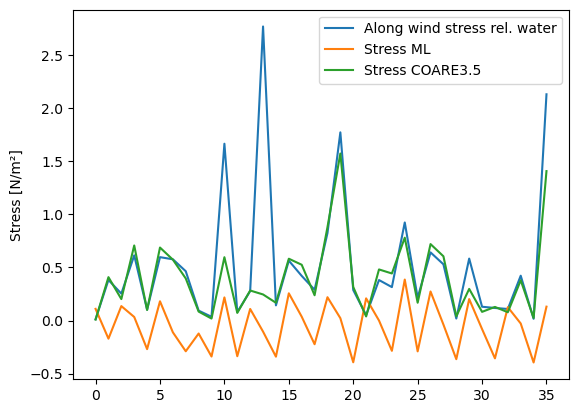

In [189]:
plt.plot(y_test.values, label='Along wind stress rel. water')
plt.plot(y_test_pred, label='Stress ML')
plt.plot(c_test.values, label='Stress COARE3.5')
plt.ylabel('Stress [N/m²]')
plt.legend()

In [190]:
rmse(y_test.values, y_test_pred)

0.8712457046949779

In [191]:
rmse(y_test.values, c_test)

0.47862192428274747

In [57]:
OUT_STEPS = 1
num_features = 1
batch_size =32
epochs=500

metric = 'mean_absolute_error'

In [58]:
try:
    del history
    del multi_dense_model
except:
    print('Variables do not exist')

In [59]:
multi_dense_model = tf.keras.Sequential([
    #tf.keras.layers.Dense(32, activation='relu'),
    #tf.keras.layers.BatchNormalization(),
    #tf.keras.layers.Dropout(rate=0.3),
    tf.keras.layers.Dense(8, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.1),
    tf.keras.layers.Dense(1)    
])

callbacks = [
    keras.callbacks.ModelCheckpoint(
        "best_model.h5", save_best_only=True, monitor="val_loss"
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=20, min_lr=0.0001
    ),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=50, verbose=1),
]

multi_dense_model.compile(
    optimizer=tf.optimizers.Adam(),
    loss=tf.losses.MeanSquaredError(),
    metrics=[tf.metrics.MeanAbsoluteError()],
)


history = multi_dense_model.fit(
    x_train,
    y_train,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_split=0.3,
    verbose=1,
)

Epoch 1/500
4/4 [==============================] - 0s 34ms/step - loss: 2.4709 - mean_absolute_error: 0.4117 - val_loss: 20.9301 - val_mean_absolute_error: 4.4365
Epoch 2/500
4/4 [==============================] - 0s 8ms/step - loss: 6.1242 - mean_absolute_error: 0.5604 - val_loss: 10.2656 - val_mean_absolute_error: 3.0881
Epoch 3/500
4/4 [==============================] - 0s 8ms/step - loss: 3.5998 - mean_absolute_error: 0.4275 - val_loss: 6.8219 - val_mean_absolute_error: 2.5012
Epoch 4/500
4/4 [==============================] - 0s 8ms/step - loss: 6.1473 - mean_absolute_error: 0.5751 - val_loss: 5.0442 - val_mean_absolute_error: 2.1358
Epoch 5/500
4/4 [==============================] - 0s 8ms/step - loss: 2.4084 - mean_absolute_error: 0.3736 - val_loss: 3.8885 - val_mean_absolute_error: 1.8605
Epoch 6/500
4/4 [==============================] - 0s 8ms/step - loss: 6.1131 - mean_absolute_error: 0.5543 - val_loss: 3.1332 - val_mean_absolute_error: 1.6561
Epoch 7/500
4/4 [==============

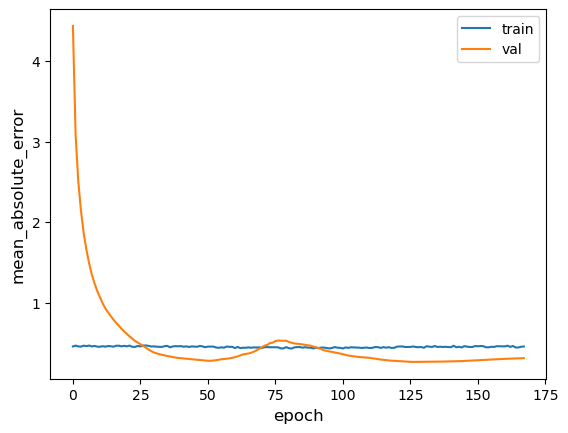

2/2 [==============================] - 0s 1ms/step - loss: 0.5190 - mean_absolute_error: 0.4643
Test accuracy 0.4643348157405853
Test loss 0.5190401673316956


In [60]:
metric = 'mean_absolute_error'
plt.figure()
plt.plot(history.history[metric])
plt.plot(history.history["val_" + metric])
#plt.title("model " + metric + "\n Dense 32 + dense 16 + batch normalization + dropout 0.3")
plt.ylabel(metric, fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val"], loc="best")
plt.show()
plt.close()

#model = keras.models.load_model("best_model.h5")

test_loss, test_acc = multi_dense_model.evaluate(x_test, y_test)

print("Test accuracy", test_acc)
print("Test loss", test_loss)

In [61]:
y_test_pred = multi_dense_model.predict(x_test)

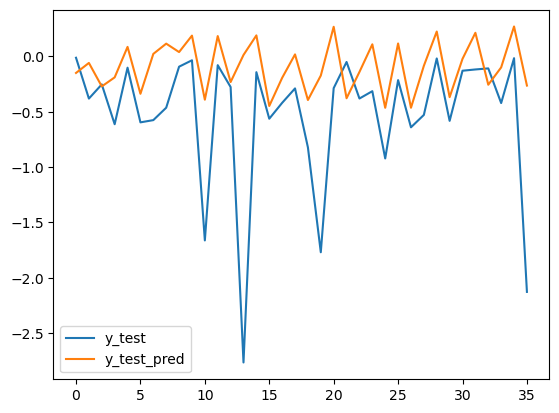

In [62]:
plt.plot(y_test.values, label='Along wind stress rel. water'')
plt.plot(y_test_pred, label='Stress ML')
plt.plot(c_test, label='Stress COARE3.5')
plt.legend()

In [63]:
rmse(y_test.values, y_test_pred)

0.7835765840266461

In [ ]:
rmse(c_test.values, y_test_pred)

In [64]:
OUT_STEPS = 1
num_features = 1
batch_size =32
epochs=500

metric = 'mean_absolute_error'

In [65]:
try:
    del history
    del multi_dense_model
except:
    print('Variables do not exist')

In [66]:
multi_dense_model = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.1),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.1),
    tf.keras.layers.Dense(1)    
])

callbacks = [
    keras.callbacks.ModelCheckpoint(
        "best_model.h5", save_best_only=True, monitor="val_loss"
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=20, min_lr=0.0001
    ),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=50, verbose=1),
]

multi_dense_model.compile(
    optimizer=tf.optimizers.Adam(),
    loss=tf.losses.MeanSquaredError(),
    metrics=[tf.metrics.MeanAbsoluteError()],
)


history = multi_dense_model.fit(
    x_train,
    y_train,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_split=0.3,
    verbose=1,
)

Epoch 1/500
4/4 [==============================] - 1s 38ms/step - loss: 2.6555 - mean_absolute_error: 0.5414 - val_loss: 172.4988 - val_mean_absolute_error: 12.8245
Epoch 2/500
4/4 [==============================] - 0s 8ms/step - loss: 2.7473 - mean_absolute_error: 0.6035 - val_loss: 83.2686 - val_mean_absolute_error: 8.8811
Epoch 3/500
4/4 [==============================] - 0s 8ms/step - loss: 1.8976 - mean_absolute_error: 0.5370 - val_loss: 52.5044 - val_mean_absolute_error: 7.0273
Epoch 4/500
4/4 [==============================] - 0s 8ms/step - loss: 6.5485 - mean_absolute_error: 0.7236 - val_loss: 37.0896 - val_mean_absolute_error: 5.8828
Epoch 5/500
4/4 [==============================] - 0s 8ms/step - loss: 2.8192 - mean_absolute_error: 0.5718 - val_loss: 27.8053 - val_mean_absolute_error: 5.0708
Epoch 6/500
4/4 [==============================] - 0s 8ms/step - loss: 1.8089 - mean_absolute_error: 0.4713 - val_loss: 21.7089 - val_mean_absolute_error: 4.4579
Epoch 7/500
4/4 [========

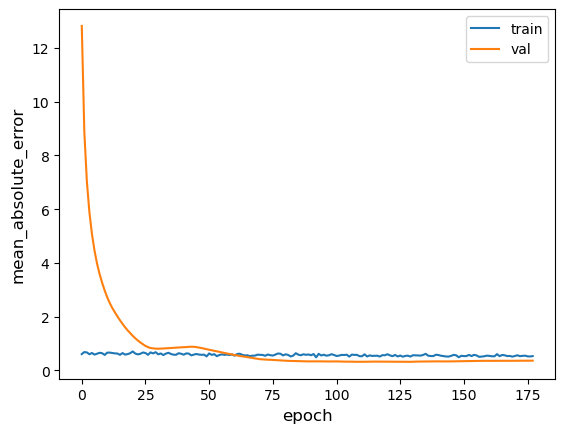

2/2 [==============================] - 0s 2ms/step - loss: 0.8824 - mean_absolute_error: 0.7186
Test accuracy 0.7186043858528137
Test loss 0.8824167847633362


In [67]:
metric = 'mean_absolute_error'
plt.figure()
plt.plot(history.history[metric])
plt.plot(history.history["val_" + metric])
#plt.title("model " + metric + "\n Dense 32 + dense 16 + batch normalization + dropout 0.3")
plt.ylabel(metric, fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val"], loc="best")
plt.show()
plt.close()

#model = keras.models.load_model("best_model.h5")

test_loss, test_acc = multi_dense_model.evaluate(x_test, y_test)

print("Test accuracy", test_acc)
print("Test loss", test_loss)

In [68]:
y_test_pred = multi_dense_model.predict(x_test)

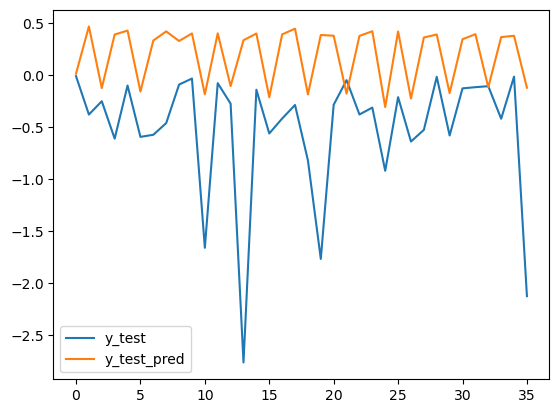

In [69]:
plt.plot(y_test.values, label='y_test')
plt.plot(y_test_pred, label='y_test_pred')
plt.legend()

In [70]:
rmse(y_test.values, y_test_pred)

0.9777099000132173

In [71]:
OUT_STEPS = 1
num_features = 1
batch_size =16
epochs=500

metric = 'mean_absolute_error'

In [72]:
try:
    del history
    del multi_dense_model
except:
    print('Variables do not exist')

In [73]:
multi_dense_model = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.1),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.1),
    tf.keras.layers.Dense(2, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.1),
    tf.keras.layers.Dense(1)    
])

callbacks = [
    keras.callbacks.ModelCheckpoint(
        "best_model.h5", save_best_only=True, monitor="val_loss"
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=20, min_lr=0.0001
    ),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=50, verbose=1),
]

multi_dense_model.compile(
    optimizer=tf.optimizers.Adam(),
    loss=tf.losses.MeanSquaredError(),
    metrics=[tf.metrics.MeanAbsoluteError()],
)


history = multi_dense_model.fit(
    x_train,
    y_train,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_split=0.3,
    verbose=1,
)

Epoch 1/500
7/7 [==============================] - 1s 81ms/step - loss: 5.7500 - mean_absolute_error: 0.5019 - val_loss: 0.2626 - val_mean_absolute_error: 0.2370
Epoch 2/500
7/7 [==============================] - 0s 5ms/step - loss: 8.7833 - mean_absolute_error: 0.5915 - val_loss: 0.2628 - val_mean_absolute_error: 0.2374
Epoch 3/500
7/7 [==============================] - 0s 4ms/step - loss: 4.1177 - mean_absolute_error: 0.4050 - val_loss: 0.2624 - val_mean_absolute_error: 0.2367
Epoch 4/500
7/7 [==============================] - 0s 5ms/step - loss: 3.1005 - mean_absolute_error: 0.3565 - val_loss: 0.2621 - val_mean_absolute_error: 0.2361
Epoch 5/500
7/7 [==============================] - 0s 5ms/step - loss: 8.9068 - mean_absolute_error: 0.6635 - val_loss: 0.2622 - val_mean_absolute_error: 0.2363
Epoch 6/500
7/7 [==============================] - 0s 4ms/step - loss: 5.6348 - mean_absolute_error: 0.4588 - val_loss: 0.2622 - val_mean_absolute_error: 0.2363
Epoch 7/500
7/7 [================

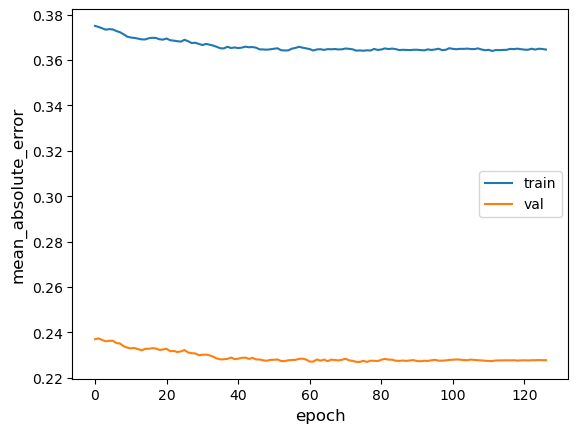

2/2 [==============================] - 0s 3ms/step - loss: 0.6360 - mean_absolute_error: 0.5077
Test accuracy 0.5077362656593323
Test loss 0.6360270977020264


In [74]:
metric = 'mean_absolute_error'
plt.figure()
plt.plot(history.history[metric])
plt.plot(history.history["val_" + metric])
#plt.title("model " + metric + "\n Dense 32 + dense 16 + batch normalization + dropout 0.3")
plt.ylabel(metric, fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val"], loc="best")
plt.show()
plt.close()

#model = keras.models.load_model("best_model.h5")

test_loss, test_acc = multi_dense_model.evaluate(x_test, y_test)

print("Test accuracy", test_acc)
print("Test loss", test_loss)

In [75]:
y_test_pred = multi_dense_model.predict(x_test)

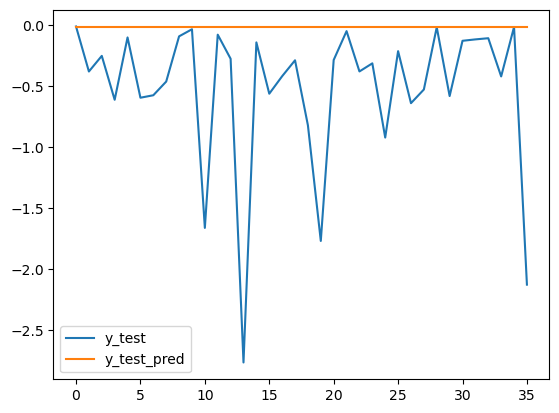

In [76]:
plt.plot(y_test.values, label='y_test')
plt.plot(y_test_pred, label='y_test_pred')
plt.legend()

In [77]:
rmse(y_test.values, y_test_pred)

0.7975130665427629

In [78]:
OUT_STEPS = 1
num_features = 1
batch_size =16
epochs=500

metric = 'mean_absolute_error'

In [79]:
try:
    del history
    del multi_dense_model
except:
    print('Variables do not exist')

In [80]:
multi_dense_model = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.1),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.1),
    tf.keras.layers.Dense(2, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.1),
    tf.keras.layers.Dense(1)    
])

callbacks = [
    keras.callbacks.ModelCheckpoint(
        "best_model.h5", save_best_only=True, monitor="val_loss"
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=20, min_lr=0.0001
    ),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=50, verbose=1),
]

multi_dense_model.compile(
    optimizer=tf.optimizers.Adam(),
    loss=tf.losses.MeanSquaredError(),
    metrics=[tf.metrics.MeanAbsoluteError()],
)


history = multi_dense_model.fit(
    x_train,
    y_train,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_split=0.3,
    verbose=1,
)

Epoch 1/500
7/7 [==============================] - 1s 22ms/step - loss: 8.7439 - mean_absolute_error: 0.8527 - val_loss: 1.5713 - val_mean_absolute_error: 1.1469
Epoch 2/500
7/7 [==============================] - 0s 5ms/step - loss: 5.0877 - mean_absolute_error: 0.6608 - val_loss: 1.0190 - val_mean_absolute_error: 0.8845
Epoch 3/500
7/7 [==============================] - 0s 5ms/step - loss: 5.4519 - mean_absolute_error: 0.6720 - val_loss: 0.8008 - val_mean_absolute_error: 0.7555
Epoch 4/500
7/7 [==============================] - 0s 5ms/step - loss: 1.6743 - mean_absolute_error: 0.4669 - val_loss: 0.6711 - val_mean_absolute_error: 0.6667
Epoch 5/500
7/7 [==============================] - 0s 5ms/step - loss: 3.9910 - mean_absolute_error: 0.5742 - val_loss: 0.5946 - val_mean_absolute_error: 0.6080
Epoch 6/500
7/7 [==============================] - 0s 5ms/step - loss: 1.1471 - mean_absolute_error: 0.4401 - val_loss: 0.5351 - val_mean_absolute_error: 0.5579
Epoch 7/500
7/7 [================

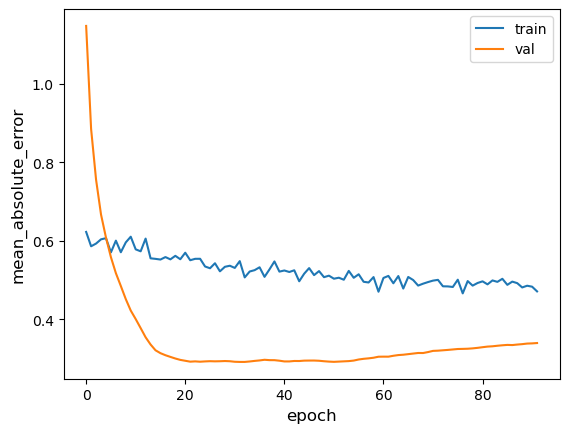

2/2 [==============================] - 0s 2ms/step - loss: 0.7217 - mean_absolute_error: 0.6119
Test accuracy 0.6118738651275635
Test loss 0.721698522567749


In [81]:
metric = 'mean_absolute_error'
plt.figure()
plt.plot(history.history[metric])
plt.plot(history.history["val_" + metric])
#plt.title("model " + metric + "\n Dense 32 + dense 16 + batch normalization + dropout 0.3")
plt.ylabel(metric, fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val"], loc="best")
plt.show()
plt.close()

#model = keras.models.load_model("best_model.h5")

test_loss, test_acc = multi_dense_model.evaluate(x_test, y_test)

print("Test accuracy", test_acc)
print("Test loss", test_loss)

In [82]:
y_test_pred = multi_dense_model.predict(x_test)

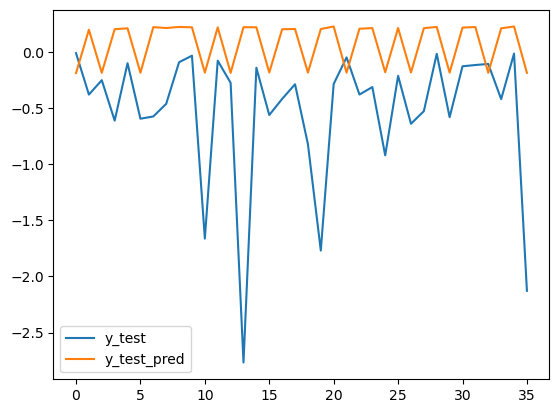

In [83]:
plt.plot(y_test.values, label='y_test')
plt.plot(y_test_pred, label='y_test_pred')
plt.legend()

In [84]:
rmse(y_test.values, y_test_pred)

0.8736263656993624

# __________________________________________________

# Using only s0_norm

In [139]:
predictor_variables = ['s0_norm']

In [140]:
x = df[predictor_variables]
x

,s0_norm
0,-7.755438
1,-7.311450
2,-10.255534
3,-8.636513
4,-14.836988
...,...
195,-10.961686
196,-9.263327
197,-5.838643
198,-11.901174


In [141]:
y = -  df['UWr'] * df['rhoair']
y

0      0.406533
1      0.086024
2     -0.000344
3      0.151889
4      0.023080
         ...   
195    0.117929
196    0.108348
197    0.421481
198    0.016227
199    2.127876
Length: 196, dtype: float64

NaNs: 

2018-12-04 11:10:59.993607         NaN

2018-12-16 23:11:59.981755         NaN

In [142]:
x_train = x[:split_idx]
x_test = x[split_idx:]

In [143]:
y_train = y[:split_idx]
y_test = y[split_idx:]

# ML setup

In [144]:
OUT_STEPS = 1
num_features = 1
batch_size =32
epochs=500

metric = 'mean_absolute_error'

In [145]:
try:
    del history
    del multi_dense_model
except:
    print('Variables do not exist')

# First experiment - Linear regression

In [146]:
multi_dense_model = tf.keras.Sequential([
    #tf.keras.layers.Dense(32, activation='relu'),
    #tf.keras.layers.BatchNormalization(),
    #tf.keras.layers.Dropout(rate=0.3),
    #tf.keras.layers.Dense(16, activation='relu'),
    #tf.keras.layers.BatchNormalization(),
    #tf.keras.layers.Dropout(rate=0.4),
    tf.keras.layers.Dense(1)    
])

callbacks = [
    keras.callbacks.ModelCheckpoint(
        "best_model.h5", save_best_only=True, monitor="val_loss"
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=20, min_lr=0.0001
    ),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=50, verbose=1),
]

multi_dense_model.compile(
    optimizer=tf.optimizers.Adam(),
    loss=tf.losses.MeanSquaredError(),
    metrics=[tf.metrics.MeanAbsoluteError()],
)


history = multi_dense_model.fit(
    x_train,
    y_train,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_split=0.3,
    verbose=1,
)

Epoch 1/500
4/4 [==============================] - 0s 30ms/step - loss: 28.3507 - mean_absolute_error: 5.0852 - val_loss: 23.3149 - val_mean_absolute_error: 4.7323
Epoch 2/500
4/4 [==============================] - 0s 7ms/step - loss: 26.1372 - mean_absolute_error: 4.9312 - val_loss: 22.8902 - val_mean_absolute_error: 4.6887
Epoch 3/500
4/4 [==============================] - 0s 7ms/step - loss: 24.5201 - mean_absolute_error: 4.8218 - val_loss: 22.4717 - val_mean_absolute_error: 4.6453
Epoch 4/500
4/4 [==============================] - 0s 7ms/step - loss: 26.9910 - mean_absolute_error: 4.9473 - val_loss: 22.0593 - val_mean_absolute_error: 4.6022
Epoch 5/500
4/4 [==============================] - 0s 7ms/step - loss: 25.0071 - mean_absolute_error: 4.8215 - val_loss: 21.6494 - val_mean_absolute_error: 4.5589
Epoch 6/500
4/4 [==============================] - 0s 7ms/step - loss: 23.3287 - mean_absolute_error: 4.6815 - val_loss: 21.2439 - val_mean_absolute_error: 4.5157
Epoch 7/500
4/4 [====

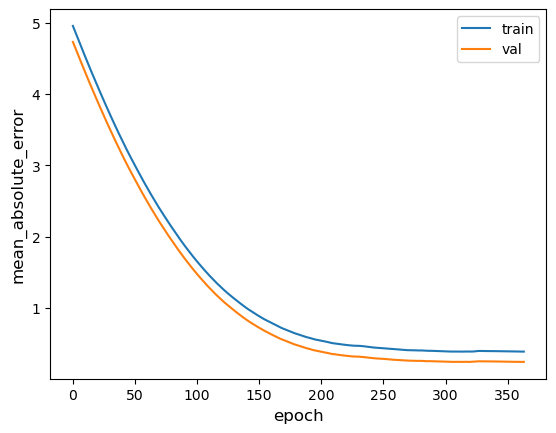

2/2 [==============================] - 0s 982us/step - loss: 0.5333 - mean_absolute_error: 0.4379
Test accuracy 0.4379386007785797
Test loss 0.5333036184310913


In [147]:
metric = 'mean_absolute_error'
plt.figure()
plt.plot(history.history[metric])
plt.plot(history.history["val_" + metric])
#plt.title("model " + metric + "\n Dense 32 + dense 16 + batch normalization + dropout 0.3")
plt.ylabel(metric, fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val"], loc="best")
plt.show()
plt.close()

#model = keras.models.load_model("best_model.h5")

test_loss, test_acc = multi_dense_model.evaluate(x_test, y_test)

print("Test accuracy", test_acc)
print("Test loss", test_loss)

In [148]:
y_test_pred = multi_dense_model.predict(x_test)

In [149]:
np.mean(y_test)

0.5215241204286514

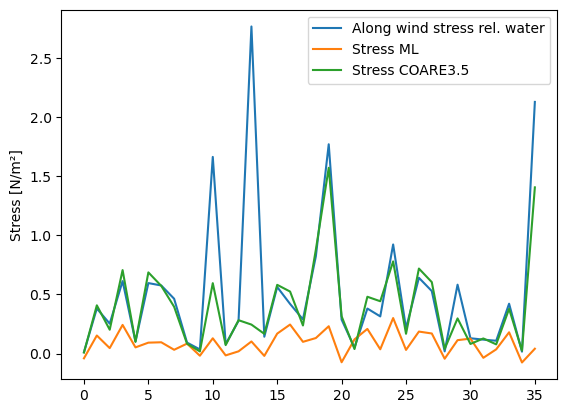

In [150]:
plt.plot(y_test.values, label='Along wind stress rel. water')
plt.plot(y_test_pred, label='Stress ML')
plt.plot(c_test.values, label='Stress COARE3.5')
plt.ylabel('Stress [N/m²]')
plt.legend()

In [151]:
rmse(y_test.values, y_test_pred)

0.7588490554547768

In [152]:
rmse(y_test.values, c_test)

0.47862192428274747

# Other experiments

In [37]:
OUT_STEPS = 1
num_features = 1
batch_size =32
epochs=500

metric = 'mean_absolute_error'

In [38]:
try:
    del history
    del multi_dense_model
except:
    print('Variables do not exist')

In [39]:
multi_dense_model = tf.keras.Sequential([
    #tf.keras.layers.Dense(32, activation='relu'),
    #tf.keras.layers.BatchNormalization(),
    #tf.keras.layers.Dropout(rate=0.3),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    #tf.keras.layers.Dropout(rate=0.4),
    tf.keras.layers.Dense(1)    
])

callbacks = [
    keras.callbacks.ModelCheckpoint(
        "best_model.h5", save_best_only=True, monitor="val_loss"
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=20, min_lr=0.0001
    ),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=50, verbose=1),
]

multi_dense_model.compile(
    optimizer=tf.optimizers.Adam(),
    loss=tf.losses.MeanSquaredError(),
    metrics=[tf.metrics.MeanAbsoluteError()],
)


history = multi_dense_model.fit(
    x_train,
    y_train,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_split=0.3,
    verbose=1,
)

Epoch 1/500
4/4 [==============================] - 0s 34ms/step - loss: 2.4610 - mean_absolute_error: 0.3114 - val_loss: 0.2615 - val_mean_absolute_error: 0.2351
Epoch 2/500
4/4 [==============================] - 0s 7ms/step - loss: 1.6481 - mean_absolute_error: 0.2869 - val_loss: 0.2605 - val_mean_absolute_error: 0.2334
Epoch 3/500
4/4 [==============================] - 0s 7ms/step - loss: 2.4699 - mean_absolute_error: 0.3076 - val_loss: 0.2610 - val_mean_absolute_error: 0.2342
Epoch 4/500
4/4 [==============================] - 0s 7ms/step - loss: 2.4671 - mean_absolute_error: 0.3048 - val_loss: 0.2611 - val_mean_absolute_error: 0.2345
Epoch 5/500
4/4 [==============================] - 0s 7ms/step - loss: 2.4210 - mean_absolute_error: 0.2794 - val_loss: 0.2611 - val_mean_absolute_error: 0.2345
Epoch 6/500
4/4 [==============================] - 0s 7ms/step - loss: 1.6311 - mean_absolute_error: 0.2749 - val_loss: 0.2608 - val_mean_absolute_error: 0.2340
Epoch 7/500
4/4 [================

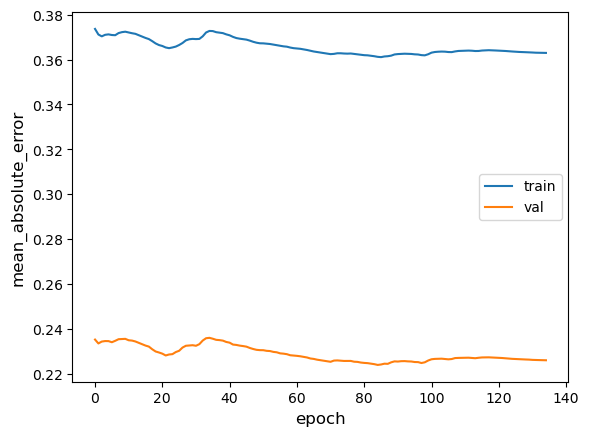

2/2 [==============================] - 0s 1ms/step - loss: 0.6333 - mean_absolute_error: 0.5053
Test accuracy 0.5052504539489746
Test loss 0.6333434581756592


In [40]:
metric = 'mean_absolute_error'
plt.figure()
plt.plot(history.history[metric])
plt.plot(history.history["val_" + metric])
#plt.title("model " + metric + "\n Dense 32 + dense 16 + batch normalization + dropout 0.3")
plt.ylabel(metric, fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val"], loc="best")
plt.show()
plt.close()

#model = keras.models.load_model("best_model.h5")

test_loss, test_acc = multi_dense_model.evaluate(x_test, y_test)

print("Test accuracy", test_acc)
print("Test loss", test_loss)

In [41]:
y_test_pred = multi_dense_model.predict(x_test)

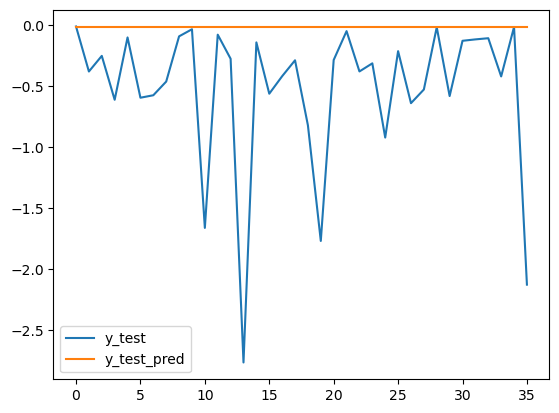

In [42]:
plt.plot(y_test.values, label='y_test')
plt.plot(y_test_pred, label='y_test_pred')
plt.legend()

In [43]:
rmse(y_test.values, y_test_pred)

0.7958287788190476

In [44]:
OUT_STEPS = 1
num_features = 1
batch_size =32
epochs=500

metric = 'mean_absolute_error'

In [45]:
try:
    del history
    del multi_dense_model
except:
    print('Variables do not exist')

In [46]:
multi_dense_model = tf.keras.Sequential([
    #tf.keras.layers.Dense(32, activation='relu'),
    #tf.keras.layers.BatchNormalization(),
    #tf.keras.layers.Dropout(rate=0.3),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(1)    
])

callbacks = [
    keras.callbacks.ModelCheckpoint(
        "best_model.h5", save_best_only=True, monitor="val_loss"
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=20, min_lr=0.0001
    ),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=50, verbose=1),
]

multi_dense_model.compile(
    optimizer=tf.optimizers.Adam(),
    loss=tf.losses.MeanSquaredError(),
    metrics=[tf.metrics.MeanAbsoluteError()],
)


history = multi_dense_model.fit(
    x_train,
    y_train,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_split=0.3,
    verbose=1,
)

Epoch 1/500
4/4 [==============================] - 0s 32ms/step - loss: 3.5281 - mean_absolute_error: 0.8918 - val_loss: 0.3156 - val_mean_absolute_error: 0.4701
Epoch 2/500
4/4 [==============================] - 0s 7ms/step - loss: 2.5774 - mean_absolute_error: 0.8412 - val_loss: 0.2884 - val_mean_absolute_error: 0.4330
Epoch 3/500
4/4 [==============================] - 0s 7ms/step - loss: 4.5492 - mean_absolute_error: 0.8532 - val_loss: 0.2655 - val_mean_absolute_error: 0.3959
Epoch 4/500
4/4 [==============================] - 0s 7ms/step - loss: 6.9639 - mean_absolute_error: 0.9858 - val_loss: 0.2480 - val_mean_absolute_error: 0.3618
Epoch 5/500
4/4 [==============================] - 0s 7ms/step - loss: 4.6377 - mean_absolute_error: 0.9051 - val_loss: 0.2354 - val_mean_absolute_error: 0.3296
Epoch 6/500
4/4 [==============================] - 0s 7ms/step - loss: 3.2016 - mean_absolute_error: 0.7661 - val_loss: 0.2274 - val_mean_absolute_error: 0.3005
Epoch 7/500
4/4 [================

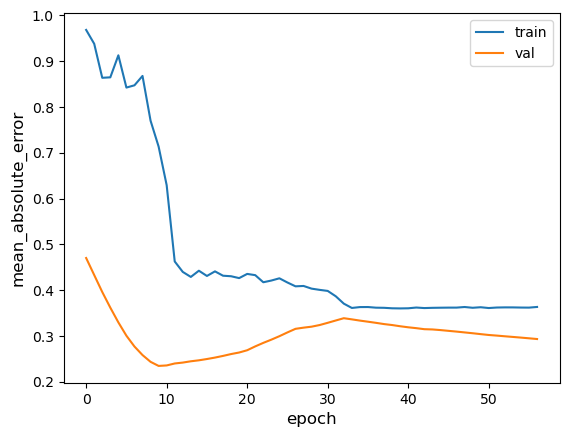

2/2 [==============================] - 0s 1ms/step - loss: 0.7110 - mean_absolute_error: 0.5767
Test accuracy 0.5767425298690796
Test loss 0.7109633088111877


In [47]:
metric = 'mean_absolute_error'
plt.figure()
plt.plot(history.history[metric])
plt.plot(history.history["val_" + metric])
#plt.title("model " + metric + "\n Dense 32 + dense 16 + batch normalization + dropout 0.3")
plt.ylabel(metric, fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val"], loc="best")
plt.show()
plt.close()

#model = keras.models.load_model("best_model.h5")

test_loss, test_acc = multi_dense_model.evaluate(x_test, y_test)

print("Test accuracy", test_acc)
print("Test loss", test_loss)

In [48]:
y_test_pred = multi_dense_model.predict(x_test)

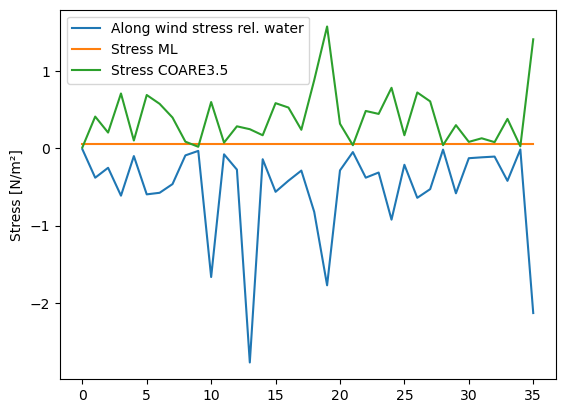

In [49]:
plt.plot(y_test.values, label='Along wind stress rel. water')
plt.plot(y_test_pred, label='Stress ML')
plt.plot(c_test.values, label='Stress COARE3.5')
plt.ylabel('Stress [N/m²]')
plt.legend()

In [50]:
rmse(y_test.values, y_test_pred)

0.843186388076254

In [51]:
rmse(c_test.values, y_test_pred)

0.49787523707407216

In [122]:
OUT_STEPS = 1
num_features = 1
batch_size =32
epochs=500

metric = 'mean_absolute_error'

In [123]:
try:
    del history
    del multi_dense_model
except:
    print('Variables do not exist')

In [124]:
multi_dense_model = tf.keras.Sequential([
    #tf.keras.layers.Dense(32, activation='relu'),
    #tf.keras.layers.BatchNormalization(),
    #tf.keras.layers.Dropout(rate=0.3),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.1),
    tf.keras.layers.Dense(1)    
])

callbacks = [
    keras.callbacks.ModelCheckpoint(
        "best_model.h5", save_best_only=True, monitor="val_loss"
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=20, min_lr=0.0001
    ),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=50, verbose=1),
]

multi_dense_model.compile(
    optimizer=tf.optimizers.Adam(),
    loss=tf.losses.MeanSquaredError(),
    metrics=[tf.metrics.MeanAbsoluteError()],
)


history = multi_dense_model.fit(
    x_train,
    y_train,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_split=0.3,
    verbose=1,
)

Epoch 1/500
4/4 [==============================] - 0s 34ms/step - loss: 2.5448 - mean_absolute_error: 0.3999 - val_loss: 0.4879 - val_mean_absolute_error: 0.6363
Epoch 2/500
4/4 [==============================] - 0s 7ms/step - loss: 2.5285 - mean_absolute_error: 0.3768 - val_loss: 0.4300 - val_mean_absolute_error: 0.5851
Epoch 3/500
4/4 [==============================] - 0s 7ms/step - loss: 3.8339 - mean_absolute_error: 0.4559 - val_loss: 0.3842 - val_mean_absolute_error: 0.5391
Epoch 4/500
4/4 [==============================] - 0s 7ms/step - loss: 6.2682 - mean_absolute_error: 0.5535 - val_loss: 0.3475 - val_mean_absolute_error: 0.5003
Epoch 5/500
4/4 [==============================] - 0s 7ms/step - loss: 6.3273 - mean_absolute_error: 0.5671 - val_loss: 0.3180 - val_mean_absolute_error: 0.4653
Epoch 6/500
4/4 [==============================] - 0s 7ms/step - loss: 2.4809 - mean_absolute_error: 0.3490 - val_loss: 0.2950 - val_mean_absolute_error: 0.4351
Epoch 7/500
4/4 [================

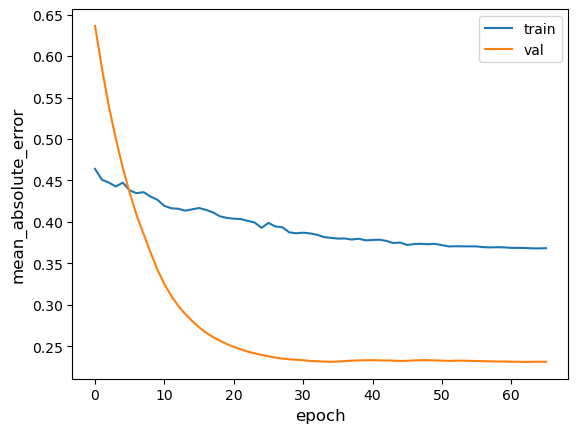

2/2 [==============================] - 0s 1ms/step - loss: 0.6432 - mean_absolute_error: 0.5136
Test accuracy 0.5135966539382935
Test loss 0.6432284712791443


In [125]:
metric = 'mean_absolute_error'
plt.figure()
plt.plot(history.history[metric])
plt.plot(history.history["val_" + metric])
#plt.title("model " + metric + "\n Dense 32 + dense 16 + batch normalization + dropout 0.3")
plt.ylabel(metric, fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val"], loc="best")
plt.show()
plt.close()

#model = keras.models.load_model("best_model.h5")

test_loss, test_acc = multi_dense_model.evaluate(x_test, y_test)

print("Test accuracy", test_acc)
print("Test loss", test_loss)

In [126]:
y_test_pred = multi_dense_model.predict(x_test)

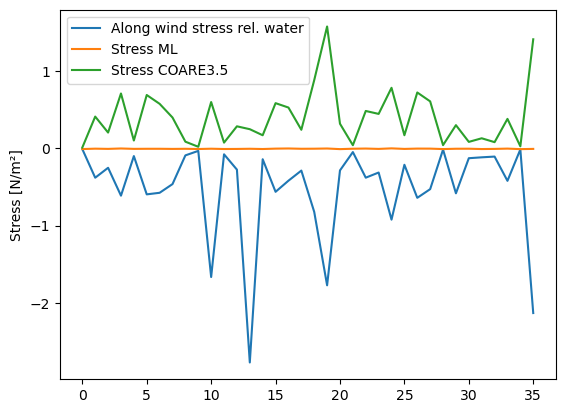

In [127]:
plt.plot(y_test.values, label='Along wind stress rel. water')
plt.plot(y_test_pred, label='Stress ML')
plt.plot(c_test.values, label='Stress COARE3.5')
plt.ylabel('Stress [N/m²]')
plt.legend()

In [128]:
rmse(y_test.values, y_test_pred)

0.8013232822298749

In [130]:
rmse(c_test.values, y_test_pred)

0.543228770295074

In [131]:
OUT_STEPS = 1
num_features = 1
batch_size =16
epochs=500

metric = 'mean_absolute_error'

In [132]:
try:
    del history
    del multi_dense_model
except:
    print('Variables do not exist')

In [133]:
multi_dense_model = tf.keras.Sequential([
    #tf.keras.layers.Dense(32, activation='relu'),
    #tf.keras.layers.BatchNormalization(),
    #tf.keras.layers.Dropout(rate=0.3),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.1),
    tf.keras.layers.Dense(1)    
])

callbacks = [
    keras.callbacks.ModelCheckpoint(
        "best_model.h5", save_best_only=True, monitor="val_loss"
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=20, min_lr=0.0001
    ),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=50, verbose=1),
]

multi_dense_model.compile(
    optimizer=tf.optimizers.Adam(),
    loss=tf.losses.MeanSquaredError(),
    metrics=[tf.metrics.MeanAbsoluteError()],
)


history = multi_dense_model.fit(
    x_train,
    y_train,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_split=0.3,
    verbose=1,
)

Epoch 1/500
7/7 [==============================] - 0s 17ms/step - loss: 4.0086 - mean_absolute_error: 0.3453 - val_loss: 0.2599 - val_mean_absolute_error: 0.2324
Epoch 2/500
7/7 [==============================] - 0s 4ms/step - loss: 2.2594 - mean_absolute_error: 0.2937 - val_loss: 0.2578 - val_mean_absolute_error: 0.2288
Epoch 3/500
7/7 [==============================] - 0s 4ms/step - loss: 8.8305 - mean_absolute_error: 0.6253 - val_loss: 0.2586 - val_mean_absolute_error: 0.2302
Epoch 4/500
7/7 [==============================] - 0s 4ms/step - loss: 1.1450 - mean_absolute_error: 0.2812 - val_loss: 0.2570 - val_mean_absolute_error: 0.2274
Epoch 5/500
7/7 [==============================] - 0s 4ms/step - loss: 1.5963 - mean_absolute_error: 0.2497 - val_loss: 0.2570 - val_mean_absolute_error: 0.2274
Epoch 6/500
7/7 [==============================] - 0s 4ms/step - loss: 4.0707 - mean_absolute_error: 0.3700 - val_loss: 0.2580 - val_mean_absolute_error: 0.2290
Epoch 7/500
7/7 [================

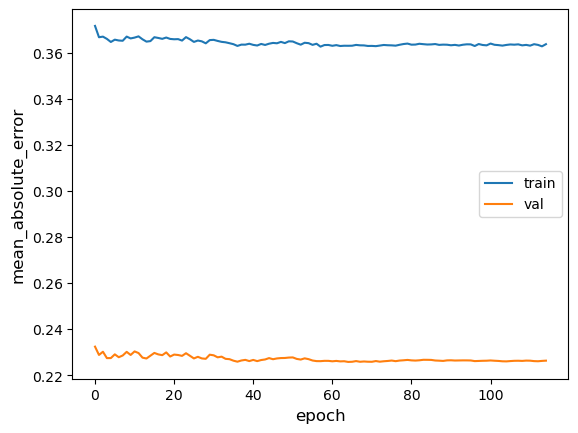

2/2 [==============================] - 0s 2ms/step - loss: 0.6339 - mean_absolute_error: 0.5058
Test accuracy 0.5057533979415894
Test loss 0.6338999271392822


In [134]:
metric = 'mean_absolute_error'
plt.figure()
plt.plot(history.history[metric])
plt.plot(history.history["val_" + metric])
#plt.title("model " + metric + "\n Dense 32 + dense 16 + batch normalization + dropout 0.3")
plt.ylabel(metric, fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val"], loc="best")
plt.show()
plt.close()

#model = keras.models.load_model("best_model.h5")

test_loss, test_acc = multi_dense_model.evaluate(x_test, y_test)

print("Test accuracy", test_acc)
print("Test loss", test_loss)

In [135]:
y_test_pred = multi_dense_model.predict(x_test)

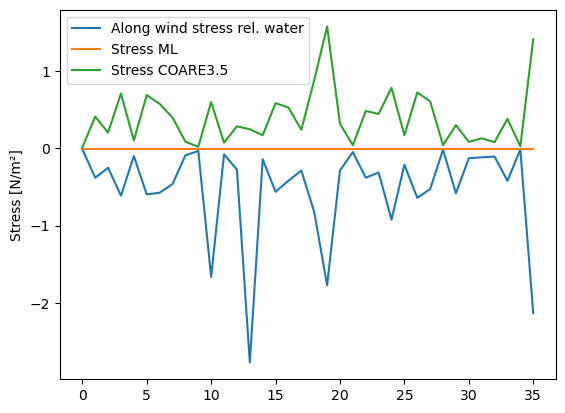

In [136]:
plt.plot(y_test.values, label='Along wind stress rel. water')
plt.plot(y_test_pred, label='Stress ML')
plt.plot(c_test.values, label='Stress COARE3.5')
plt.ylabel('Stress [N/m²]')
plt.legend()

In [137]:
rmse(y_test.values, y_test_pred)

0.7961783425118757

In [138]:
rmse(y_test.values, c_test)

1.2841384219310785

In [ ]:
OUT_STEPS = 1
num_features = 1
batch_size =32
epochs=500

metric = 'mean_absolute_error'

In [ ]:
try:
    del history
    del multi_dense_model
except:
    print('Variables do not exist')

In [ ]:
multi_dense_model = tf.keras.Sequential([
    #tf.keras.layers.Dense(32, activation='relu'),
    #tf.keras.layers.BatchNormalization(),
    #tf.keras.layers.Dropout(rate=0.3),
    tf.keras.layers.Dense(8, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.1),
    tf.keras.layers.Dense(1)    
])

callbacks = [
    keras.callbacks.ModelCheckpoint(
        "best_model.h5", save_best_only=True, monitor="val_loss"
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=20, min_lr=0.0001
    ),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=50, verbose=1),
]

multi_dense_model.compile(
    optimizer=tf.optimizers.Adam(),
    loss=tf.losses.MeanSquaredError(),
    metrics=[tf.metrics.MeanAbsoluteError()],
)


history = multi_dense_model.fit(
    x_train,
    y_train,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_split=0.3,
    verbose=1,
)

In [ ]:
metric = 'mean_absolute_error'
plt.figure()
plt.plot(history.history[metric])
plt.plot(history.history["val_" + metric])
#plt.title("model " + metric + "\n Dense 32 + dense 16 + batch normalization + dropout 0.3")
plt.ylabel(metric, fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val"], loc="best")
plt.show()
plt.close()

#model = keras.models.load_model("best_model.h5")

test_loss, test_acc = multi_dense_model.evaluate(x_test, y_test)

print("Test accuracy", test_acc)
print("Test loss", test_loss)

In [ ]:
y_test_pred = multi_dense_model.predict(x_test)

In [ ]:
plt.plot(y_test.values, label='y_test')
plt.plot(y_test_pred, label='y_test_pred')
plt.legend()

In [ ]:
rmse(y_test.values, y_test_pred)

In [ ]:
OUT_STEPS = 1
num_features = 1
batch_size =32
epochs=500

metric = 'mean_absolute_error'

In [ ]:
try:
    del history
    del multi_dense_model
except:
    print('Variables do not exist')

In [ ]:
multi_dense_model = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.1),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.1),
    tf.keras.layers.Dense(1)    
])

callbacks = [
    keras.callbacks.ModelCheckpoint(
        "best_model.h5", save_best_only=True, monitor="val_loss"
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=20, min_lr=0.0001
    ),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=50, verbose=1),
]

multi_dense_model.compile(
    optimizer=tf.optimizers.Adam(),
    loss=tf.losses.MeanSquaredError(),
    metrics=[tf.metrics.MeanAbsoluteError()],
)


history = multi_dense_model.fit(
    x_train,
    y_train,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_split=0.3,
    verbose=1,
)

In [ ]:
metric = 'mean_absolute_error'
plt.figure()
plt.plot(history.history[metric])
plt.plot(history.history["val_" + metric])
#plt.title("model " + metric + "\n Dense 32 + dense 16 + batch normalization + dropout 0.3")
plt.ylabel(metric, fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val"], loc="best")
plt.show()
plt.close()

#model = keras.models.load_model("best_model.h5")

test_loss, test_acc = multi_dense_model.evaluate(x_test, y_test)

print("Test accuracy", test_acc)
print("Test loss", test_loss)

In [ ]:
y_test_pred = multi_dense_model.predict(x_test)

In [ ]:
plt.plot(y_test.values, label='y_test')
plt.plot(y_test_pred, label='y_test_pred')
plt.legend()

In [ ]:
rmse(y_test.values, y_test_pred)

In [ ]:
OUT_STEPS = 1
num_features = 1
batch_size =16
epochs=500

metric = 'mean_absolute_error'

In [ ]:
try:
    del history
    del multi_dense_model
except:
    print('Variables do not exist')

In [ ]:
multi_dense_model = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.1),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.1),
    tf.keras.layers.Dense(2, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.1),
    tf.keras.layers.Dense(1)    
])

callbacks = [
    keras.callbacks.ModelCheckpoint(
        "best_model.h5", save_best_only=True, monitor="val_loss"
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=20, min_lr=0.0001
    ),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=50, verbose=1),
]

multi_dense_model.compile(
    optimizer=tf.optimizers.Adam(),
    loss=tf.losses.MeanSquaredError(),
    metrics=[tf.metrics.MeanAbsoluteError()],
)


history = multi_dense_model.fit(
    x_train,
    y_train,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_split=0.3,
    verbose=1,
)

In [ ]:
metric = 'mean_absolute_error'
plt.figure()
plt.plot(history.history[metric])
plt.plot(history.history["val_" + metric])
#plt.title("model " + metric + "\n Dense 32 + dense 16 + batch normalization + dropout 0.3")
plt.ylabel(metric, fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val"], loc="best")
plt.show()
plt.close()

#model = keras.models.load_model("best_model.h5")

test_loss, test_acc = multi_dense_model.evaluate(x_test, y_test)

print("Test accuracy", test_acc)
print("Test loss", test_loss)

In [ ]:
y_test_pred = multi_dense_model.predict(x_test)

In [ ]:
plt.plot(y_test.values, label='y_test')
plt.plot(y_test_pred, label='y_test_pred')
plt.legend()

In [ ]:
rmse(y_test.values, y_test_pred)

In [ ]:
OUT_STEPS = 1
num_features = 1
batch_size =16
epochs=500

metric = 'mean_absolute_error'

In [ ]:
try:
    del history
    del multi_dense_model
except:
    print('Variables do not exist')

In [ ]:
multi_dense_model = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.1),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.1),
    tf.keras.layers.Dense(2, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.1),
    tf.keras.layers.Dense(1)    
])

callbacks = [
    keras.callbacks.ModelCheckpoint(
        "best_model.h5", save_best_only=True, monitor="val_loss"
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=20, min_lr=0.0001
    ),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=50, verbose=1),
]

multi_dense_model.compile(
    optimizer=tf.optimizers.Adam(),
    loss=tf.losses.MeanSquaredError(),
    metrics=[tf.metrics.MeanAbsoluteError()],
)


history = multi_dense_model.fit(
    x_train,
    y_train,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_split=0.3,
    verbose=1,
)

In [ ]:
metric = 'mean_absolute_error'
plt.figure()
plt.plot(history.history[metric])
plt.plot(history.history["val_" + metric])
#plt.title("model " + metric + "\n Dense 32 + dense 16 + batch normalization + dropout 0.3")
plt.ylabel(metric, fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val"], loc="best")
plt.show()
plt.close()

#model = keras.models.load_model("best_model.h5")

test_loss, test_acc = multi_dense_model.evaluate(x_test, y_test)

print("Test accuracy", test_acc)
print("Test loss", test_loss)

In [ ]:
y_test_pred = multi_dense_model.predict(x_test)

In [ ]:
plt.plot(y_test.values, label='y_test')
plt.plot(y_test_pred, label='y_test_pred')
plt.legend()

In [ ]:
rmse(y_test.values, y_test_pred)

# predictors to use for the ML and validation: extraction


ml_predictors = [
    # # electromagnetic fluxes
    "IR",
    "Solar",
    # #---------- 
    # # specific humidities
    "Q10",
    "SSQ",
    "Qair",
    # #---------- 
    # # relative humidities
    "RH",
    # "RH10",
    # #---------- 
    # # air characteristics
    # "rhoair",
    # "P10",
    # "Pair",
    # #---------- 
    # # temperatures
    "SST",
    "T10",
    # "Tair",
    "Tsea",
    # "Tseasonic",
    # "Tsonic",
    # #---------- 
    # # waves
    # "Tm",
    "Tp",
    # "cp",
    "sigH",
    "sigHDir",
    # #---------- 
    # # wind characteristics
    # "U10e",
    "U10r",
    # "Ue",
    # "Ur",
    # "Wdir",
    "Wdirr",
    # #---------- 
    # # Obukhov scaling
    "moL",
    # "moLcbrt",
    # "moLclipped",
    # "moLinv",
    # #---------- 
    # # bulk fluxes
    "lhf",
    "shf",
    # # ----------
    # # composite variables
    # 'windspeed_over_wavecp',
    # 'mismatch_winddir_wavedir',
    # 'difference_specific_humidity',
    # # ----------
    # # others
    # "WTr",
    ## "Lv",
    # "stress",
]
